## Задание 1 (Свёртка)

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$: 
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F) 
к изображению, после чего выведите результат на экран.

In [ ]:
np.pad(M, pad_width=1, mode='constant', constant_values=5)

array([[5, 5, 5, 5, 5, 5, 5, 5],
       [5, 0, 1, 2, 0, 1, 2, 5],
       [5, 3, 4, 5, 3, 4, 5, 5],
       [5, 6, 7, 8, 6, 7, 8, 5],
       [5, 0, 1, 2, 0, 1, 2, 5],
       [5, 3, 4, 5, 3, 4, 5, 5],
       [5, 6, 7, 8, 6, 7, 8, 5],
       [5, 5, 5, 5, 5, 5, 5, 5]])

In [ ]:
import numpy as np
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a], [a, a]])
#print(M)


def conv(x, stride, pad):
    # Put your code here
    x = np.pad(x, pad_width=1, mode='constant', constant_values=pad)
    
    i = 0
    G1m = []
    G2m = []
    while (i+3) <= x.shape[0]:
        row1 = []
        row2 = []
       # print(i)
        j= 0 
        while (j+3) <= x.shape[1]:
            #print(j)
            G1 = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
            G2 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
            #print(x[i:i+3, j:j+3])
            G1res = np.dot(G1, x[i:i+3, j:j+3])
            G2res = np.dot(G2,x[i:i+3, j:j+3])
            row1.append(np.sum(G1res))
            row2.append(np.sum(G2res))
            j += stride
        G1m.append(row1)
        G2m.append(row2)
        i += stride
    G1m = np.array(G1m)
    G2m = np.array(G2m)
    G = np.power((np.power(G1m,2) + np.power(G2m, 2)), 1/2)
    return G
            

    

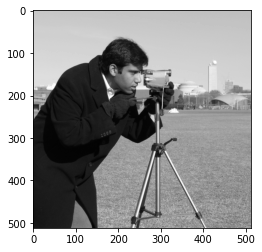

In [ ]:
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.figure()
plt.imshow(camera, cmap='gray', vmin=0, vmax=255)

# put your code here

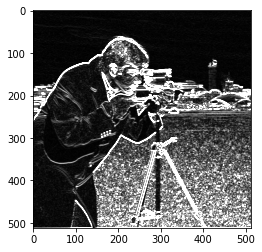

In [ ]:
# stride 1
plt.imshow(conv(camera, 1,5), cmap='gray', vmin=0, vmax=255) 

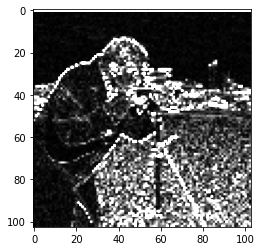

In [ ]:
# stride 5
plt.imshow(conv(camera, 5,5), cmap='gray', vmin=0, vmax=255) 

# Задание №2

Создайте сверточную сеть на Pytorch и обучите ее на СIFAR10.

Используйте не более трёх сверточных и не более двух полносвязанных слоев, а также один слой субдискретизации.

Функцию активации выберите на свое усмотрение.

Не применяйте слои других типов.

Используйте код для обучения из лекции №5.

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F


class TwoLayerCNN(nn.Module):

    def __init__(self):
        """
          Define 2 - 4 convolutional layers : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
          with corresponding in/out dimensions

          Also define max pooling: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
          and fully connected layer: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        
        """
        
        super().__init__()
        #self.model = self.seq
        self.model = nn.Sequential(
          nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(5400, 10)
        )



    def forward(self, x):  # Forward will be Called from  parent __call__ method
        scores = self.model(x)
        return scores

Метод для подсчета точности

In [14]:
# Validation function. Don't change this code

import torch.optim as optim


def validate(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.to('cuda')
            labels = labels.to('cuda')
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

Загрузите CIFAR10

In [ ]:
import torchvision
from torchvision.datasets import CIFAR10

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()])

trainset = CIFAR10(root='./CIFAR10', train=True,
                   download=True, transform=transform)
testset = CIFAR10(root='./CIFAR10', train=False,
                  download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


In [ ]:
from torch.utils.data import DataLoader
batch_size = 256

trainloader = DataLoader(trainset, batch_size=batch_size,
                         shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size,
                        shuffle=False, num_workers=2)
classnames = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень',
              'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

Разместите код для обучения в этом блоке. 

Используйте GPU. Для этого Вам необходимо в верхней панели выбрать `Среда выполнения > Сменить среду выполнения` и заменить None на GPU.

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)


# Put your code here

Using device: cuda


In [15]:
def train(model, loss_function, optimizer, epochs=10, tag="cifar10"):
    
    for epoch in range(epochs):
        print(epoch)
        hist_loss = 0
        for images, labels in trainloader:  # get bacth
            images = images.to('cuda')
            labels = labels.to('cuda')
            outputs = model(images)  # call forward inside

            loss = loss_function(outputs, labels)  # calculate loss
            loss.backward()  # calculate gradients
            # performs a single optimization step (parameter update).
            optimizer.step()
            # sets the gradients of all optimized tensors to zero.
            optimizer.zero_grad()

            hist_loss += loss.item() 
           # For stat only

       
    accuracy = validate(model, testloader)
    return accuracy

In [ ]:
images.device

device(type='cpu')

In [ ]:
model = TwoLayerCNN()  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')
train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)

0
1
2
3
4
5
6
7
8
9


0.3208

# Задание №3

Постройте график зависимости точности вашей модели от количества свёрточных слоёв в ней. График строится на основе точности модели после десятой эпохи обучения. 

In [ ]:
class TwoLayerCNN(nn.Module):

    def __init__(self, sequence):
        """
          Define 2 - 4 convolutional layers : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
          with corresponding in/out dimensions

          Also define max pooling: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
          and fully connected layer: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        
        """
        
        super().__init__()
        self.sequence = sequence
        self.model = self.sequence
        


    def forward(self, x):  # Forward will be Called from  parent __call__ method
        scores = self.model(x)
        return scores

In [ ]:
sequence1 = nn.Sequential(
          nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(5400, 10)
        )


model = TwoLayerCNN(sequence = sequence1)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')



accur1 = train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)


0
1
2
3
4
5
6
7
8
9


In [ ]:
print(accur1)

0.3286


In [ ]:
tinynet = nn.Sequential(
          nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Conv2d(6, 3, 3),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(2352, 10)
        )

tinytensor = torch.rand(1,3, 32,32)
tinynet(tinytensor).shape

torch.Size([1, 10])

In [ ]:
sequence2 = nn.Sequential(
          nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Conv2d(6, 3, 3),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(2352, 10)
        )



model = TwoLayerCNN(sequence = sequence2)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')



accur2 = train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)


0
1
2
3
4
5
6
7
8
9


In [ ]:
print(accur2)

0.3159


In [ ]:
tinynet = nn.Sequential(
          nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Conv2d(6, 10, 10),
          nn.ReLU(),
          nn.Conv2d(10, 20, 10),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(2880, 10)
        )

tinytensor = torch.rand(1,3, 32,32)
tinynet(tinytensor).shape

torch.Size([1, 2880])

In [ ]:
sequence3 = nn.Sequential(
         nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Conv2d(6, 10, 10),
          nn.ReLU(),
          nn.Conv2d(10, 20, 10),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(2880, 10)
        )



model = TwoLayerCNN(sequence = sequence3)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')



accur3 = train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)
print(accur3)

0
1
2
3
4
5
6
7
8
9
0.2427


In [ ]:
tinynet = nn.Sequential(
          nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Conv2d(6, 3, 3),
          nn.ReLU(),
          nn.Conv2d(3, 2, 1),
          nn.ReLU(),
          nn.Conv2d(2, 1, 1),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(784, 10))
        

tinytensor = torch.rand(1,3, 32,32)
tinynet(tinytensor).shape

torch.Size([1, 10])

In [ ]:
sequence4 = nn.Sequential(
          nn.Conv2d(3, 6, 3),
          nn.ReLU(),
          nn.Conv2d(6, 3, 3),
          nn.ReLU(),
          nn.Conv2d(3, 2, 1),
          nn.ReLU(),
          nn.Conv2d(2, 1, 1),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(784, 10)
        )



model = TwoLayerCNN(sequence = sequence4)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')



accur4 = train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)
print(accur4)

0
1
2
3
4
5
6
7
8
9
0.0894


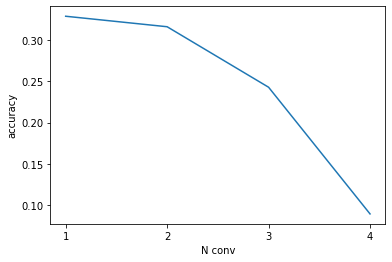

In [ ]:
import matplotlib.pyplot as plt

plt.plot(['1','2','3','4'], [accur1,accur2,accur3,accur4])
plt.xlabel('N conv')
plt.ylabel('accuracy')
plt.show()
# Place your code here

Вывод:  
 с увеличением числа слоев accuracy падает (в не зависимости от того, увеличиваем ли мы число выходных каналов в свертке и уменьшаем). Скорее всего это связано с маленьким размером изображения

# Задание №4

Используя созданные датасеты, обучите свёрточную нейронную сеть для определения заболевания растения. Используя фиксированную (по свёрточным слоям) архитектуру модели, посмотрите на качество обучения при различных размерах входных изображений и опишите причину наблюдаемой закономерности.

In [2]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2021-11-20 13:21:44--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M   173MB/s    in 0.8s    

2021-11-20 13:21:45 (173 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2021-11-20 13:21:45--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[=============

In [ ]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F

In [2]:
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
import torch
import os

In [4]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=500):
        # folder with images
        self.img_dir = img_dir
        # ordered list of all the images
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # map names to class idx
        self.class_dir = {name: idx for idx, name in enumerate(class_names)}

        # set of transforms applied to the images
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean=[0.5183, 0.4845, 0.6570],
                                      std=[0.2111, 0.2227, 0.2291]
        )])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # applying transforms
        transformed_img = self.transforms(image)

        # picking the penultimate folder name
        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]

        return transformed_img, label

In [36]:
train_dataset = BeanDataset('./train/', side_size=50)
valid_dataset = BeanDataset('./validation/', side_size=50)
test_dataset = BeanDataset('./test/', side_size=50)

In [37]:
trainloader = DataLoader(train_dataset, batch_size=32)
testloader = DataLoader(test_dataset, batch_size=32)

In [ ]:
# размер картинки [32, 3, 50, 50]

In [12]:
class TwoLayerCNN(nn.Module):

    def __init__(self, sequence):
        """
          Define 2 - 4 convolutional layers : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
          with corresponding in/out dimensions

          Also define max pooling: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
          and fully connected layer: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        
        """
        
        super().__init__()
        self.sequence = sequence
        self.model = self.sequence
        


    def forward(self, x):  # Forward will be Called from  parent __call__ method
        scores = self.model(x)
        return scores

In [34]:
tinynet = nn.Sequential(
         nn.Conv2d(3, 1, 30),
          nn.ReLU(),
          nn.Flatten(),
          
          nn.Linear(441, 3),

          )
        

tinytensor = torch.rand(32, 3, 50, 50)
tinynet(tinytensor).shape

torch.Size([32, 3])

In [38]:
sequence1 = nn.Sequential(
         nn.Conv2d(3, 1, 30),
          nn.ReLU(),
          nn.Flatten(),
          
          nn.Linear(441, 3),

          )
        

model = TwoLayerCNN(sequence = sequence1)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')

accur1 = train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)
print(accur1)

0
1
2
3
4
5
6
7
8
9
0.453125


In [43]:
train_dataset = BeanDataset('./train/',side_size=100)

test_dataset = BeanDataset('./test/',side_size=100)
trainloader = DataLoader(train_dataset, batch_size=32)
testloader = DataLoader(test_dataset, batch_size=32)

In [44]:
tinynet = nn.Sequential(
         nn.Conv2d(3, 1, 30),
          nn.ReLU(),
          nn.Flatten(),
          
          nn.Linear(5041, 3),

          )
        
        
        

tinytensor = torch.rand(32, 3, 100, 100)
tinynet(tinytensor).shape

torch.Size([32, 3])

In [46]:
sequence2 = nn.Sequential(
         nn.Conv2d(3, 1, 30),
          nn.ReLU(),
          nn.Flatten(),
          
          nn.Linear(5041, 3),

          )
        

model = TwoLayerCNN(sequence = sequence2)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')

accur2 = train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)
print(accur2)

0
1
2
3
4
5
6
7
8
9
0.3125


In [47]:
train_dataset = BeanDataset('./train/',side_size=200)

test_dataset = BeanDataset('./test/',side_size=200)
trainloader = DataLoader(train_dataset, batch_size=32)
testloader = DataLoader(test_dataset, batch_size=32)

In [49]:
tinynet = nn.Sequential(
         nn.Conv2d(3, 1, 30),
          nn.ReLU(),
          nn.Flatten(),
          
          nn.Linear(29241, 3),

          )
        
        

tinytensor = torch.rand(32, 3, 200, 200)
tinynet(tinytensor).shape

torch.Size([32, 3])

In [50]:
sequence3 = nn.Sequential(
         nn.Conv2d(3, 1, 30),
          nn.ReLU(),
          nn.Flatten(),
          
          nn.Linear(29241, 3),

          )
        

model = TwoLayerCNN(sequence = sequence3)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Weight update
model = model.to('cuda')

accur3 = train(model, nn.CrossEntropyLoss(), optimizer, epochs=10)
print(accur3)

0
1
2
3
4
5
6
7
8
9
0.328125


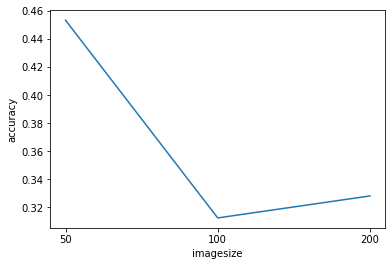

In [51]:
import matplotlib.pyplot as plt

plt.plot(['50','100','200'], [accur1,accur2,accur3])
plt.xlabel('imagesize')
plt.ylabel('accuracy')
plt.show()
# Place your code here

Вывод: 
В датасете 3 класса (согласно описанию в гугле: 2 болезни и 1 здоровый) 
С увеличением размера изображения качество для простейшей архитектуры с одной сверткой резко падает (при увеличении с 50 до 100), а потом растет, но не разительно. Скорее всего это может быть связано с неоптимальной архитектурой, которая не позволяет ловить тонки изменения, только большие паттерны, поэтому при увеличении размера изображения качество не увеличивается